In [135]:
%config InlineBackend.figure_formats = ['retina']


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from seaborn import heatmap 

from keras.layers import Dense, Activation
from keras.models import Sequential

# Import data

In [127]:
data = pd.read_csv('./data/SeoulBikeData.csv', encoding='latin1')

In [128]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)

# Change string values to integers

In [129]:
data['Functioning Day'] = (data['Functioning Day']=='Yes').astype(int)

In [130]:
data['Holiday'] = (data['Holiday']=='Holiday').astype(int)

In [131]:
data = data.replace({'Seasons': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}})

In [132]:
data = data.set_index(data.Date).drop('Date', axis=1)

In [133]:
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1


In [138]:
data.corr('pearson')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.544659e-15,-1.391486e-16,0.005439
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,-0.050170
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,-0.026000
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,-0.052837
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,0.032089


> Il serait peut être pertinent certaines features si celles ci sont très corrélées avec des features déjà présentes, par exemple :
>>  Dew point temperature & Temperature 

In [39]:
X, y = data.drop('Rented Bike Count', axis=1), data['Rented Bike Count']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [41]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# SVR

In [42]:
regr = SVR(C=100)
regr.fit(x_train, y_train)

SVR(C=100)

In [43]:
regr.score(x_train, y_train), regr.score(x_test, y_test)

(0.7380345281428717, 0.7123928938846705)

In [44]:
y_pred_svr = regr.predict(x_test)

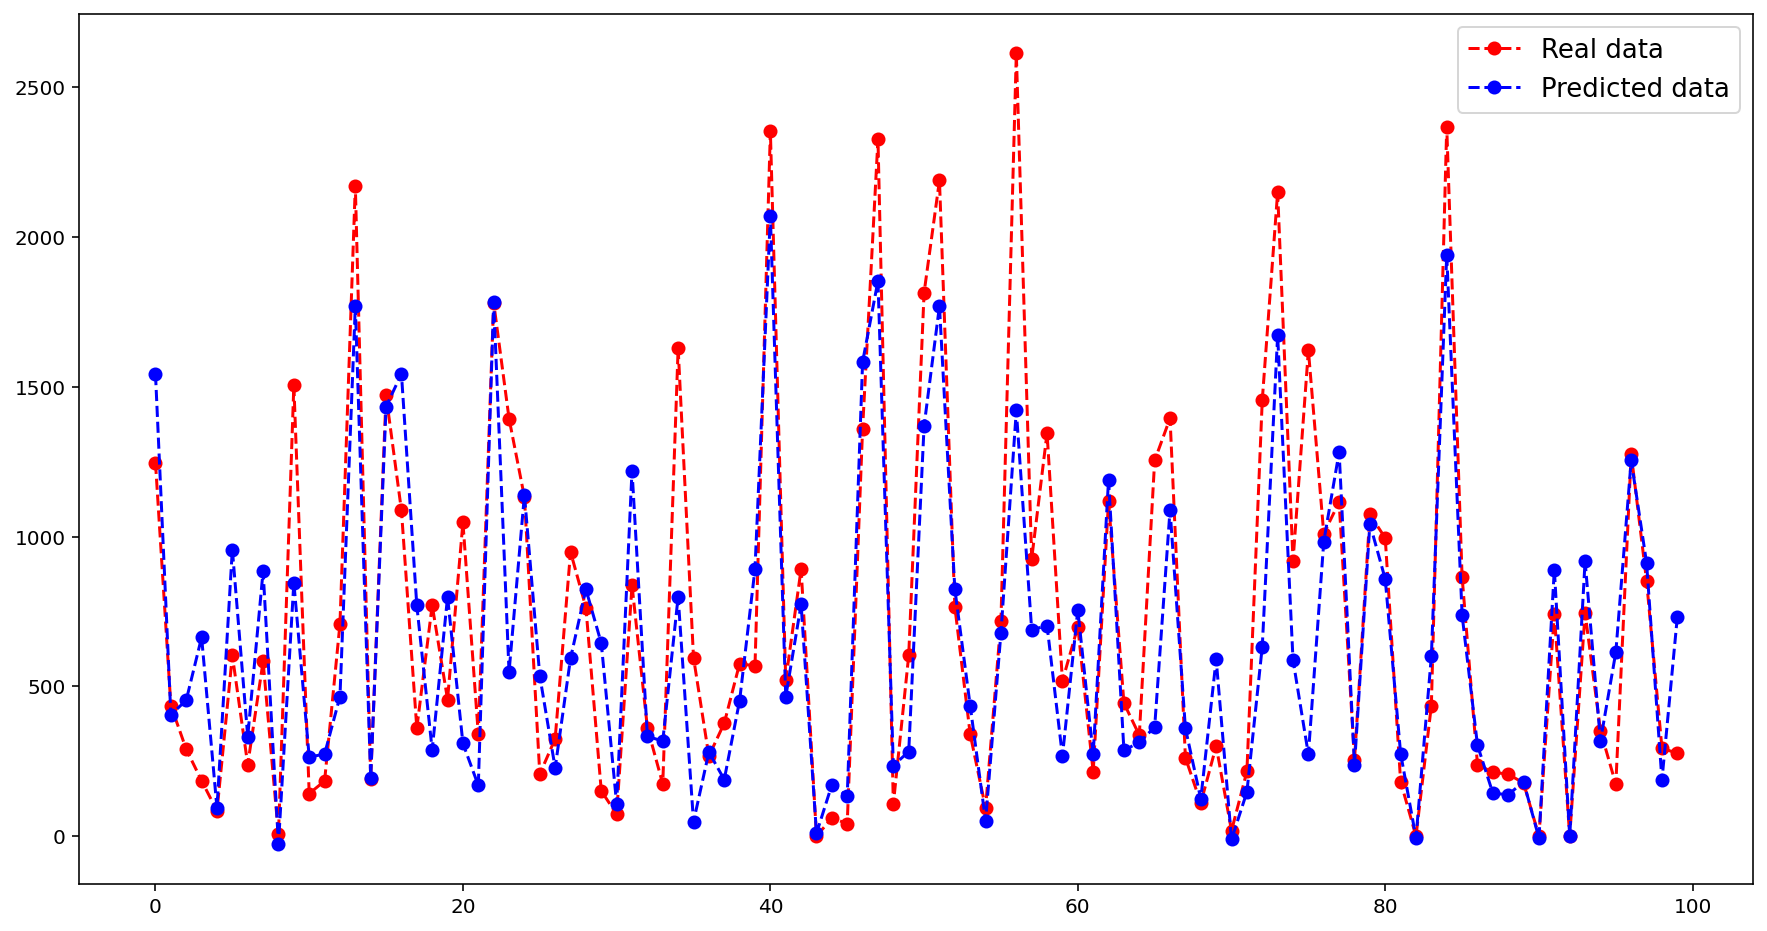

In [45]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_svr[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Lasso

In [46]:
lasso = Lasso(alpha=0.1, max_iter=5000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=5000)

In [47]:
lasso.score(x_train, y_train), lasso.score(x_test, y_test)

(0.5538538662964723, 0.5256816367615788)

In [48]:
y_pred_lasso = lasso.predict(x_test)

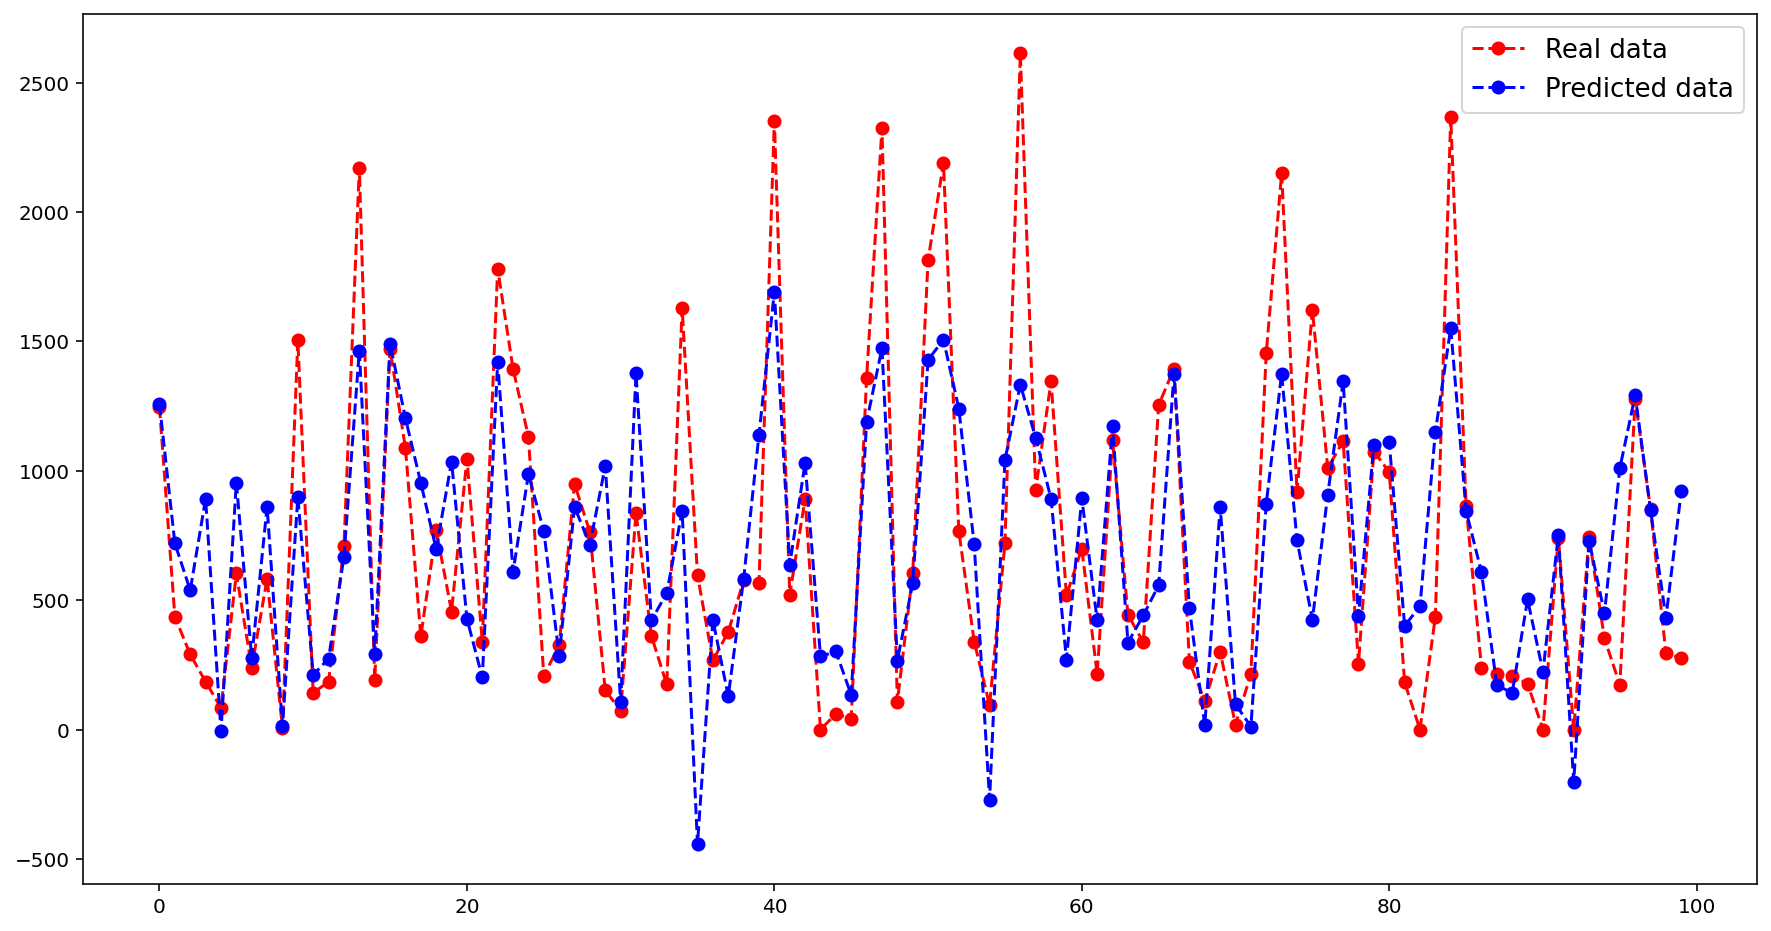

In [49]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_lasso[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Ridge

In [50]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [51]:
ridge.score(x_train, y_train), ridge.score(x_test, y_test)

(0.5538551160886793, 0.5256616228680382)

In [52]:
y_pred_ridge = ridge.predict(x_test)

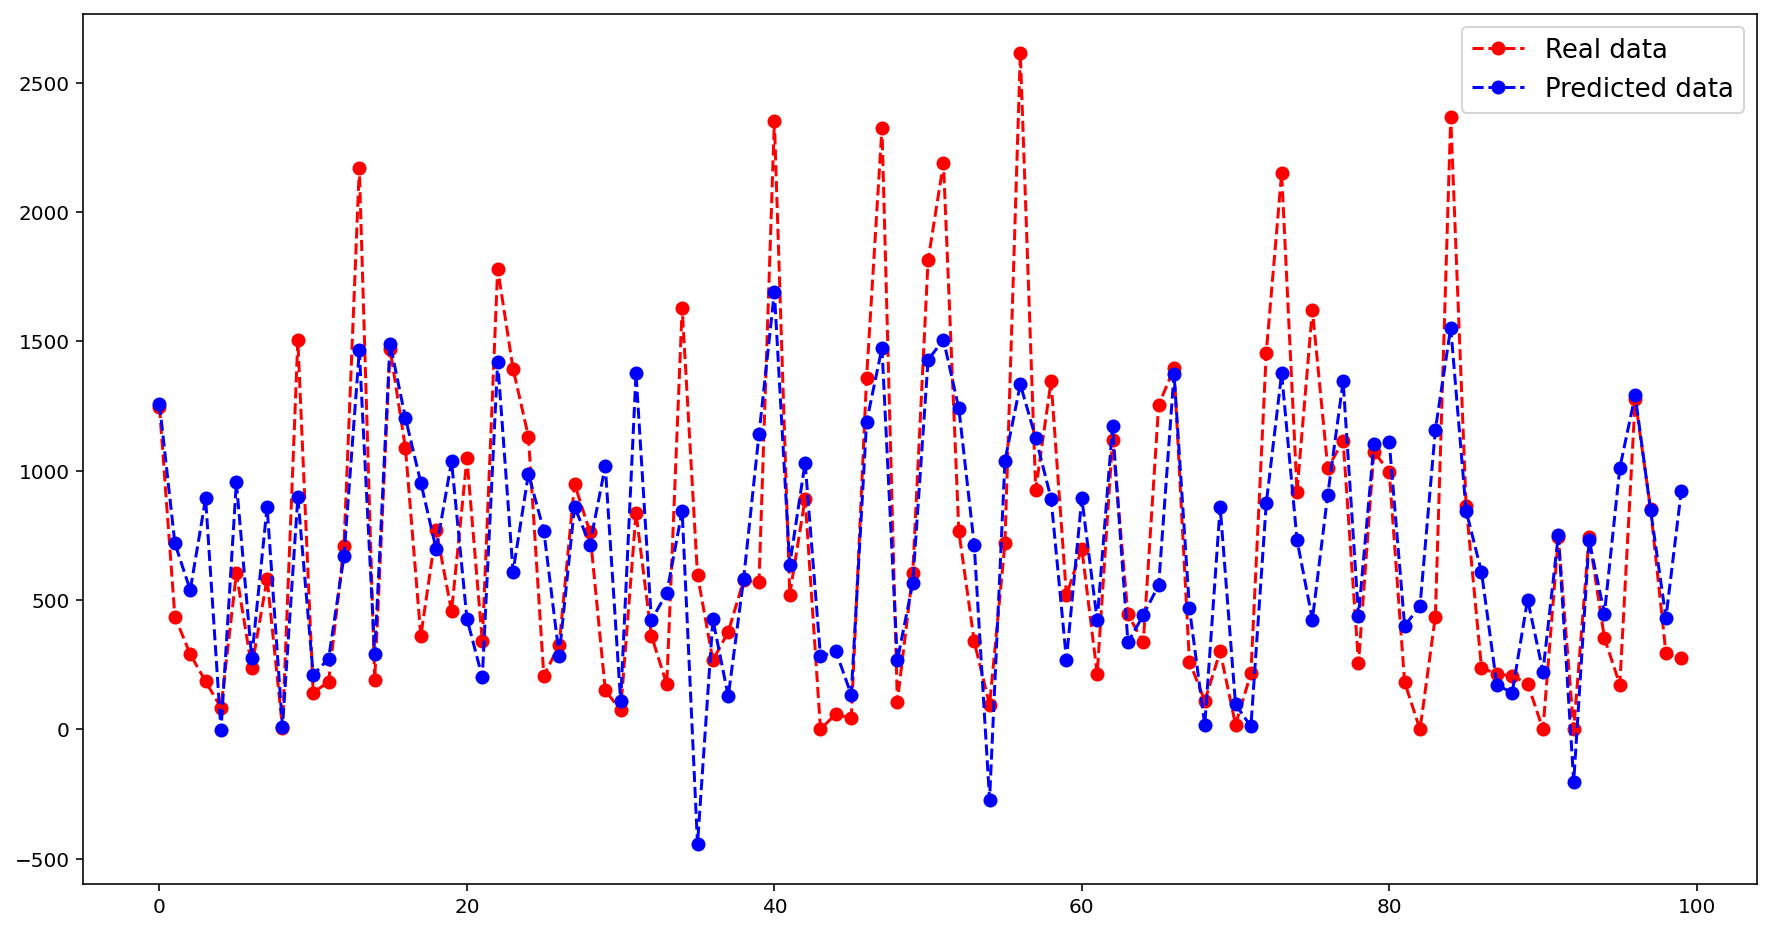

In [53]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_ridge[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Regression tree

In [54]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [55]:
reg_tree.score(x_train, y_train), reg_tree.score(x_test, y_test)

(1.0, 0.7725430708332376)

In [56]:
y_pred_tree = reg_tree.predict(x_test)

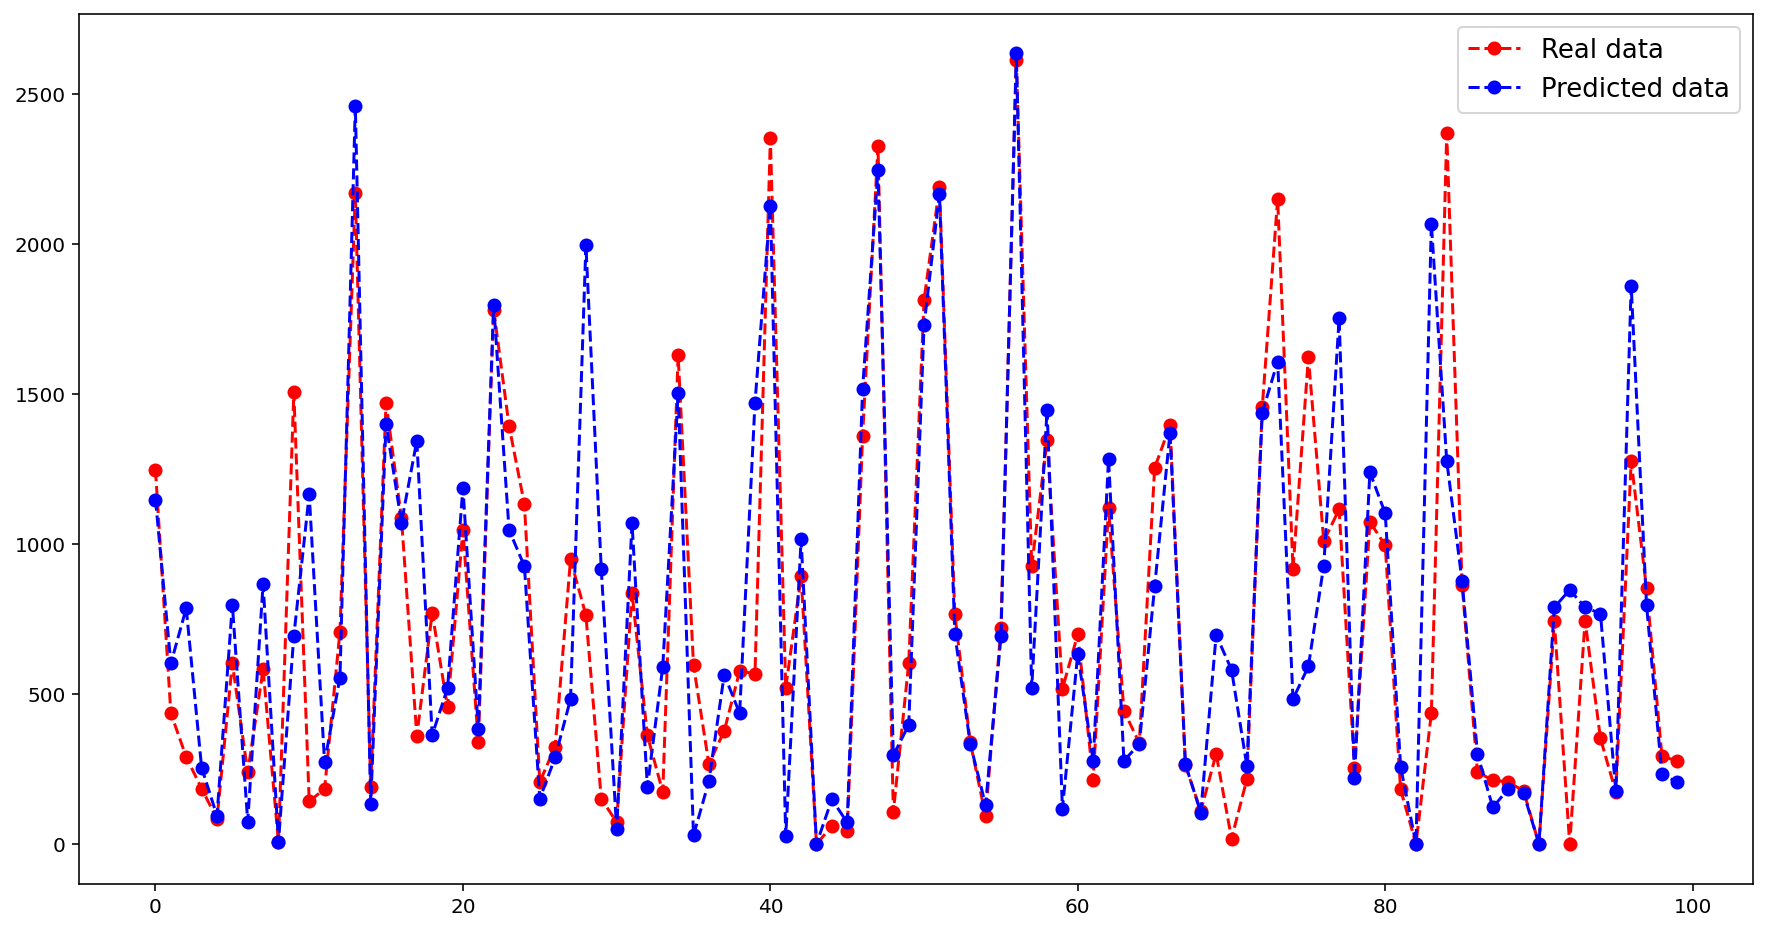

In [57]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_tree[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Random Forest regression

In [85]:
reg_forest = RandomForestRegressor()
reg_forest.fit(x_train, y_train)

RandomForestRegressor()

In [86]:
reg_forest.score(x_train, y_train), reg_forest.score(x_test, y_test)

(0.9814236469452036, 0.8686696201617405)

In [141]:
y_pred_forest = reg_forest.predict(x_test)

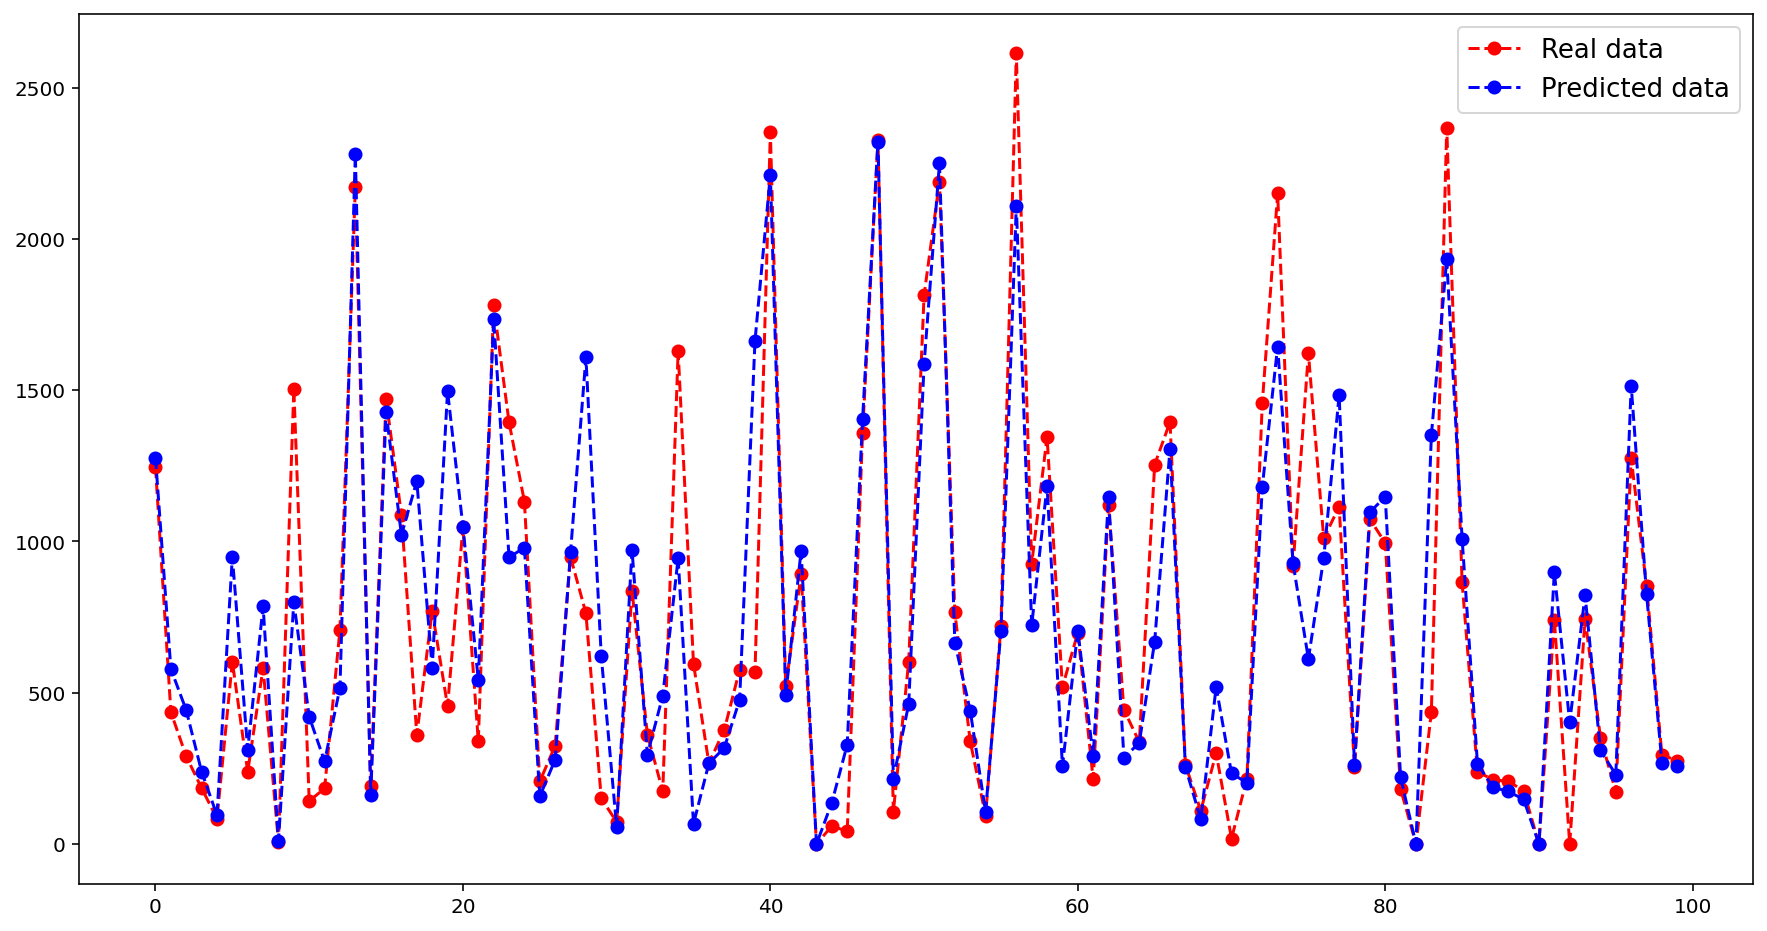

In [61]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_forest[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

### Cross Validation 

In [142]:
%%time 

max_depth = [None, 10, 20, 30, 40,50, 60]
tuned_parameters = {'min_samples_leaf' : np.arange(1,10)}
param_grid = {'max_depth': [80, 90, 100, 110],'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12]}
rf_random = GridSearchCV(RandomForestRegressor(), param_grid)

rf_random.fit(x_train, y_train)

CPU times: user 2min 56s, sys: 3.69 s, total: 3min
Wall time: 3min 10s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]})

In [143]:
rf_random.best_score_

0.851297620991492

On obtient un score qui est pire que sans ```GridSearchCV``` ...

# Neural network

In [91]:
model = Sequential()

model.add(Dense(units = 128, activation='relu', input_dim=12))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [92]:
history = model.fit(x_train, y_train, batch_size = 25, epochs = 500, validation_data=(x_test, y_test), verbose=0)

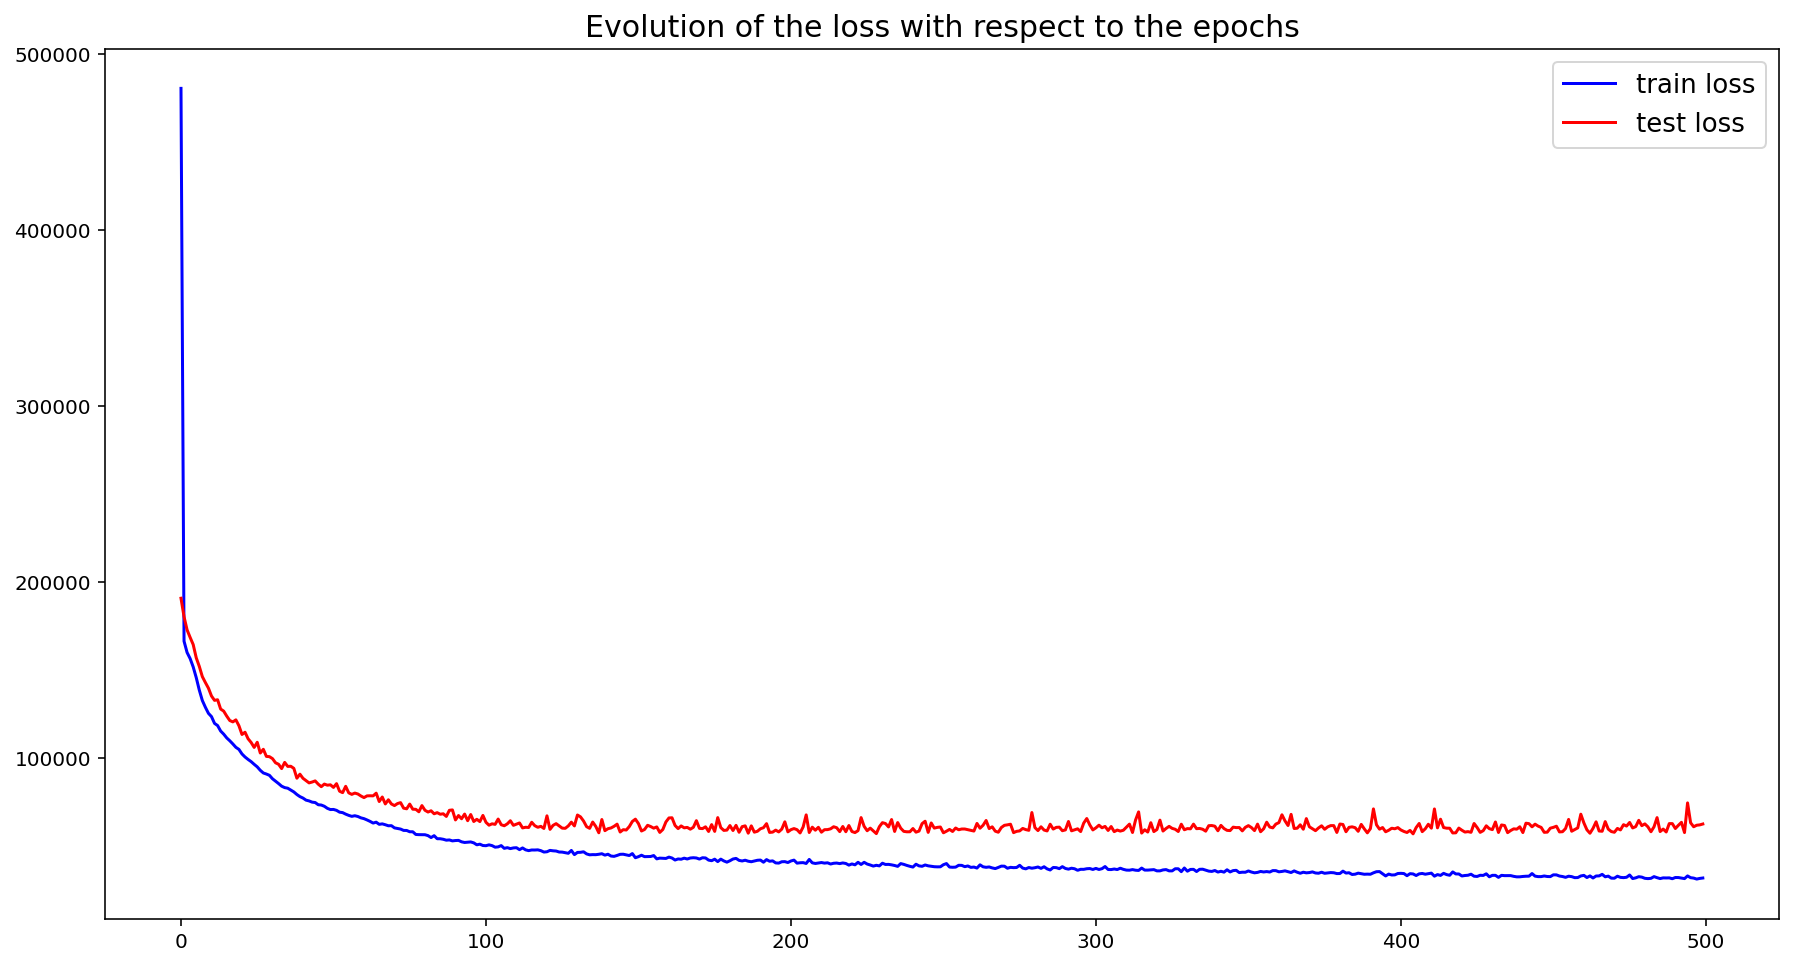

In [93]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15,8))
plt.plot(loss, c='b', label='train loss')
plt.plot(val_loss, c='r', label='test loss')
plt.title('Evolution of the loss with respect to the epochs', size=15)
plt.legend(fontsize=13)
plt.show()

In [94]:
y_pred_NN = model.predict(x_test)

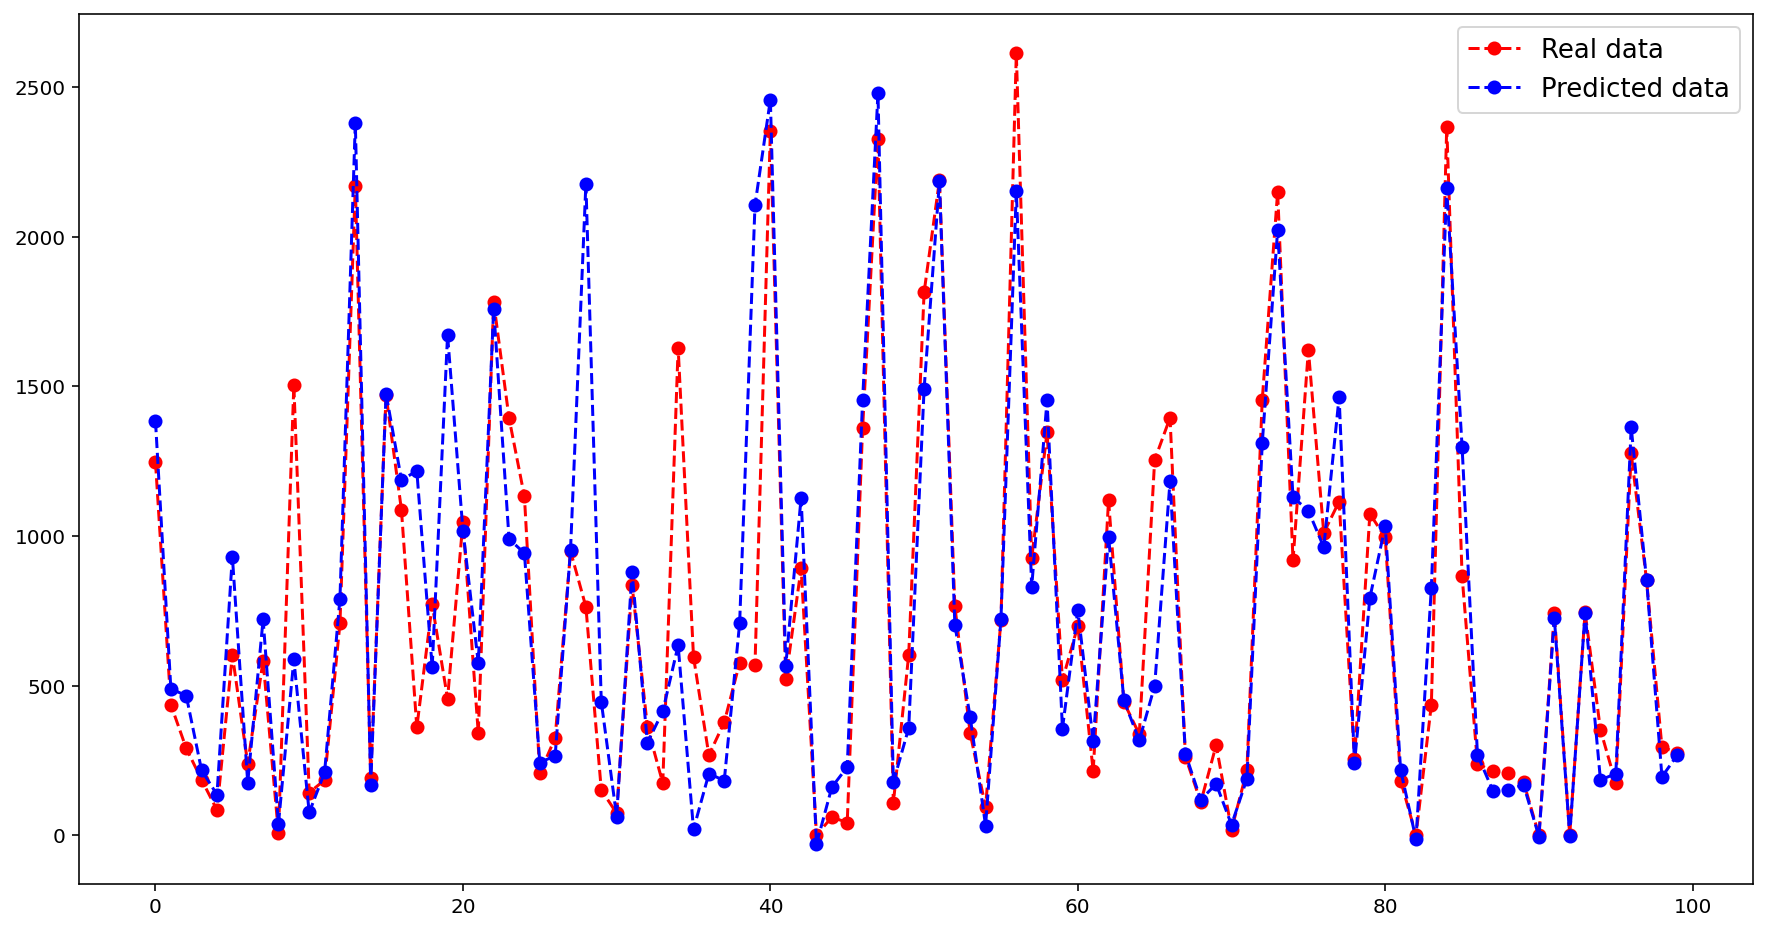

In [95]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_NN[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

In [96]:
model.evaluate(x_test, y_test), model.evaluate(x_train, y_train)

184/184 [==============================] - 0s 738us/step - loss: 29737.9805


(62770.8671875, 29737.98046875)